- To fit the parameters of a logistic Regression model, we're going to try to find the values of the parameters w and b that minimize the cost function J(w,b) by applying gradient descent.
- Here the gradient descent algorithm repeatedly update each parameters as the 0 value minus Alpha, the learning rate times the derivative term
    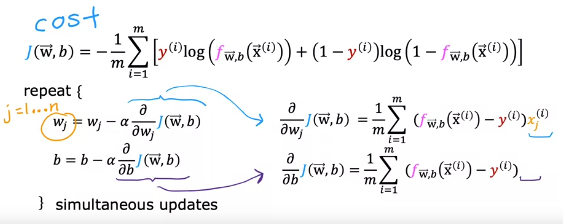
- 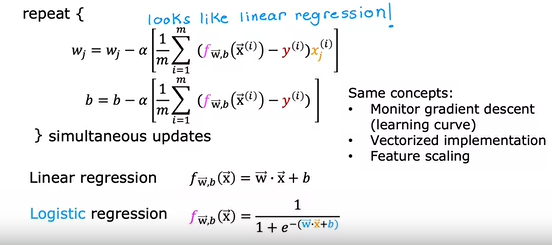

## Optional Lab : Gradient Descent for Logistic Regression
- Update gradient descent for Logistic Regression
- Explore gradient descent on a familiar data set.

In [1]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

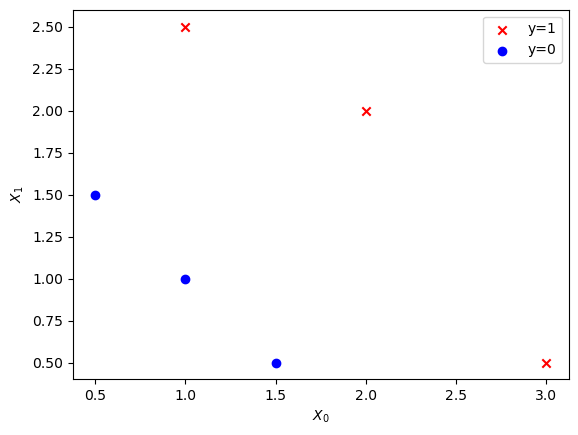

In [3]:
pos = y_train == 1
neg = y_train == 0

plt.scatter(X_train[pos][:, 0], X_train[pos][:, 1], marker='x', c='red', label='y=1')
plt.scatter(X_train[neg][:, 0], X_train[neg][:, 1], marker='o', c='blue', label='y=0')
plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend()
plt.show()

### Logistic Gradient Descent
- 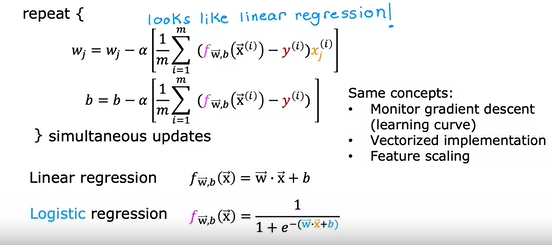
- 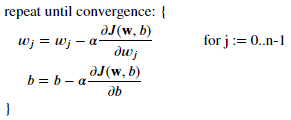
- Where each iteration perform simultaneous updates on wj for all j, where
    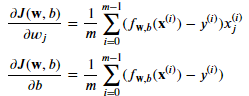
- m is the number of training examples in the data set
- f_w,b(xi) is the model's prediction, while yi is the target
- For a logisitic Regression model
    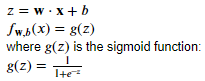

In [4]:
def sigmoid(z):
    '''compute the sigmoid of z
    
    Args : 
        z (ndarray) : A Scalar, numpy of any size.
        
    Retrurns : 
        g (ndarray) : sigmoid(z), with the same shape as z
    '''
    
    g = 1/(1+np.exp(-z))
    return g

In [27]:
def compute_cost_logistic(X, y, w, b):
    '''
    Computes Cost
    
    Args : 
        X (ndarray (m, n)) : Data, m examples with n features
        y (ndarray (m, )) : Target values
        w (ndarray (n, )) : Model Parameters
        b (scalar) : Model Parameter
        
    Returns : 
        cost (scalar) : cost
    '''
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        z_i = np.dot(X[i], w) + b
        f_wb_i = sigmoid(z_i)
        cost += -y[i]*np.log(f_wb_i) - (1-y[i])*np.log(1 - f_wb_i)
    
    cost = cost / m
    return cost

In [10]:
def compute_gradient_logistic(X, y, w, b):
    '''
    Computes the gradient for logistic Regression
    
    Args:
      X (ndarray (m,n): Data, m examples with n features
      y (ndarray (m,)): target values
      w (ndarray (n,)): model parameters  
      b (scalar)      : model parameter
    Returns
      dj_dw (ndarray (n,)): The gradient of the cost w.r.t. the parameters w. 
      dj_db (scalar)      : The gradient of the cost w.r.t. the parameter b. 
    '''
    
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i*X[i, j]
        dj_db = dj_db + err_i
    dj_dw = dj_dw/m
    dj_db = dj_db/m
    
    return dj_db, dj_dw

In [15]:
X_tmp = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_tmp = np.array([0, 0, 0, 1, 1, 1])
w_tmp = np.array([2.,3.])
b_tmp = 1.

dj_db_tmp, dj_dw_tmp = compute_gradient_logistic(X_tmp, y_tmp, w_tmp, b_tmp)
print(f"dj_db: {dj_db_tmp}" )
print(f"dj_dw: {dj_dw_tmp}" )

dj_db: 0.49861806546328574
dj_dw: [0.49833339 0.49883943]


In [30]:
def gradient_descent(X, y, w_in, b_in, alpha, num_iters):
    
    '''
    Performs Batch gradient Descent
   
    Args:
      X (ndarray (m,n)   : Data, m examples with n features
      y (ndarray (m,))   : target values
      w_in (ndarray (n,)): Initial values of model parameters  
      b_in (scalar)      : Initial values of model parameter
      alpha (float)      : Learning rate
      num_iters (scalar) : number of iterations to run gradient descent
      
    Returns:
      w (ndarray (n,))   : Updated values of parameters
      b (scalar)         : Updated value of parameter 
    ''' 
    
    # An array to store cost J and w's at each iteration primarily for graphing
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    
    for i in range(num_iters):
        # Calculate the gradient and update the parameters
        dj_db, dj_dw = compute_gradient_logistic(X, y, w, b)
        
        # Update parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        # Save cost J at each iteration
        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b))
        
        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]}")
    
    return w, b, J_history

In [31]:
w_tmp = np.zeros_like(X_train[0])
b_tmp = 0.
alpha = 0.1
iters = 10000

w_out, b_out, _ = gradient_descent(X_train, y_train, w_tmp, b_tmp, alpha, iters) 
print(f"updated parameters: w:{w_out}, b:{b_out}\n")

Iteration    0: Cost 0.684610468560574
Iteration 1000: Cost 0.1590977666870457
Iteration 2000: Cost 0.08460064176930078
Iteration 3000: Cost 0.05705327279402531
Iteration 4000: Cost 0.04290759421682
Iteration 5000: Cost 0.03433847729884557
Iteration 6000: Cost 0.02860379802212006
Iteration 7000: Cost 0.02450156960879306
Iteration 8000: Cost 0.02142370332569295
Iteration 9000: Cost 0.019030137124109114
updated parameters: w:[5.28123029 5.07815608], b:-14.222409982019837



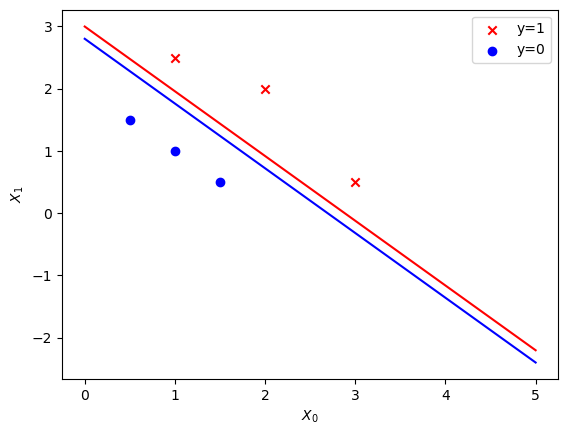

In [36]:
x0 = np.arange(0, 6)

# Plot the 2 decision boundaries
x1 = (-b_out - w_out[0]*x0)/w_out[1]
x2 = (1-b_out - w_out[0]*x0)/w_out[1]

plt.scatter(X_train[pos][:, 0], X_train[pos][:, 1], marker='x', c='red', label='y=1')
plt.scatter(X_train[neg][:, 0], X_train[neg][:, 1], marker='o', c='blue', label='y=0')
plt.plot(x0, x1, c = 'blue')
plt.plot(x0, x2, c = 'red')


plt.xlabel('$X_0$')
plt.ylabel('$X_1$')
plt.legend()
plt.show()

## LAb : Logistic Regression Using scikit-Learn
- Train a logistic regression model using scikit-learn

In [37]:
import numpy as np

X = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y = np.array([0, 0, 0, 1, 1, 1])

In [38]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(X, y)

LogisticRegression()

In [39]:
y_pred = lr_model.predict(X)
y_pred

array([0, 0, 0, 1, 1, 1])

In [40]:
# Calculating the accuracy using score function
lr_model.score(X, y)

1.0